In [19]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import requests
from scipy import stats

from config import geoapify_key

In [2]:
# Import dataset into dataframe
ca_fire_data = pd.read_csv('Resources/CA_Fires.csv', parse_dates=['DISCOVERY_DATE', 'CONT_DATE'], dtype={'FIRE_YEAR': str, 'LOCAL_INCIDENT_ID': str, 'FIRE_CODE': str, 'COUNTY': str})
ca_fire_data['duration'] = (ca_fire_data['CONT_DATE'] - ca_fire_data['DISCOVERY_DATE']).dt.days

# if ca_fire_data['duration'] == 0.0:
# ca_fire_data['duration'] = (ca_fire_data['CONT_TIME'] - ca_fire_data[])

print(ca_fire_data.columns)
ca_fire_data.head()

Index(['FPA_ID', 'SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_UNIT_NAME',
       'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME',
       'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'duration'],
      dtype='object')


FPA_ID SOURCE_SYSTEM_TYPE  NWCG_REPORTING_UNIT_NAME  \
0  FS-1418826                FED    Plumas National Forest   
1  FS-1418827                FED  Eldorado National Forest   
2  FS-1418835                FED  Eldorado National Forest   
3  FS-1418845                FED  Eldorado National Forest   
4  FS-1418847                FED  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  LOCAL_FIRE_REPORT_ID  \
0                  0511     Plumas National Forest                   1.0   
1                  0503   Eldorado National Forest                  13.0   
2                  0503   Eldorado National Forest                  27.0   
3                  0503   Eldorado National Forest                  43.0   
4                  0503   Eldorado National Forest                  44.0   

  LOCAL_INCIDENT_ID FIRE_CODE FIRE_NAME ICS_209_PLUS_INCIDENT_JOIN_ID  ...  \
0            PNF-47      BJ8K  FOUNTAIN                           NaN  ...   
1                13      AAC0    PIGEON                           NaN  ...   
2               021      A32W     SLACK                           NaN  ...   
3                 6       NaN      DEER                           NaN  ...   
4                 7       NaN  STEVENOT                           NaN  ...   

  CONT_TIME FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  \
0    1730.0      0.10               A  40.036944 -121.005833   
1    1530.0      0.25               A  38.933056 -120.404444   
2    2024.0      0.10               A  38.984167 -120.735556   
3    1400.0      0.10               A  38.559167 -119.913333   
4    1200.0      0.10               A  38.559167 -119.933056   

        OWNER_DESCR  COUNTY  FIPS_CODE         FIPS_NAME duration  
0              USFS      63     6063.0     Plumas County      0.0  
1              USFS      61     6061.0     Placer County      0.0  
2  STATE OR PRIVATE      17     6017.0  El Dorado County      0.0  
3              USFS       3     6003.0     Alpine County      5.0  
4              USFS       3     6003.0     Alpine County      5.0  

[5 rows x 33 columns]

In [3]:
ca_fire_data.dtypes

FPA_ID                                   object
SOURCE_SYSTEM_TYPE                       object
NWCG_REPORTING_UNIT_NAME                 object
SOURCE_REPORTING_UNIT                    object
SOURCE_REPORTING_UNIT_NAME               object
LOCAL_FIRE_REPORT_ID                    float64
LOCAL_INCIDENT_ID                        object
FIRE_CODE                                object
FIRE_NAME                                object
ICS_209_PLUS_INCIDENT_JOIN_ID            object
ICS_209_PLUS_COMPLEX_JOIN_ID             object
MTBS_ID                                  object
MTBS_FIRE_NAME                           object
COMPLEX_NAME                             object
FIRE_YEAR                                object
DISCOVERY_DATE                   datetime64[ns]
DISCOVERY_DOY                             int64
DISCOVERY_TIME                          float64
NWCG_CAUSE_CLASSIFICATION                object
NWCG_GENERAL_CAUSE                       object
NWCG_CAUSE_AGE_CATEGORY                 

In [4]:
ca_fire_data.dropna()
ca_fire_times = ca_fire_data[["FPA_ID","SOURCE_REPORTING_UNIT_NAME","FIRE_NAME","DISCOVERY_TIME","CONT_TIME"]]

ca_fire_times["Burn Time"] = (ca_fire_data["CONT_TIME"] - ca_fire_data["DISCOVERY_TIME"])

ca_fire_times

/Users/neth/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


FPA_ID      SOURCE_REPORTING_UNIT_NAME FIRE_NAME  \
0                 FS-1418826          Plumas National Forest  FOUNTAIN   
1                 FS-1418827        Eldorado National Forest    PIGEON   
2                 FS-1418835        Eldorado National Forest     SLACK   
3                 FS-1418845        Eldorado National Forest      DEER   
4                 FS-1418847        Eldorado National Forest  STEVENOT   
...                      ...                             ...       ...   
183879  ICS209_2019_10757785  Ventura County Fire Department     MARIA   
183880  ICS209_2019_10762771            San Luis Obispo Unit   BELMONT   
183881  ICS209_2019_10781965                Santa Clara Unit      ROCK   
183882  ICS209_2019_10802166          Plumas National Forest    WALKER   
183883  ICS209_2020_11781527            Merced-Mariposa Unit     POWER   

        DISCOVERY_TIME  CONT_TIME  Burn Time  
0               1300.0     1730.0      430.0  
1                845.0     1530.0      685.0  
2               1921.0     2024.0      103.0  
3               1600.0     1400.0     -200.0  
4               1600.0     1200.0     -400.0  
...                ...        ...        ...  
183879          2115.0        NaN        NaN  
183880          1900.0        NaN        NaN  
183881          2230.0        NaN        NaN  
183882          1446.0        NaN        NaN  
183883          1958.0        NaN        NaN  

[183884 rows x 6 columns]

# 1) Number of Fires Each Year

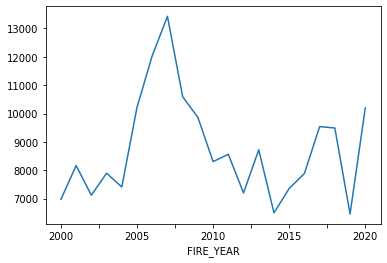

In [5]:
fires_per_year = ca_fire_data.groupby('FIRE_YEAR').count()['FPA_ID']
fires_per_year.plot(kind='line')
plt.show()

# 2) Acreage Burned by Year

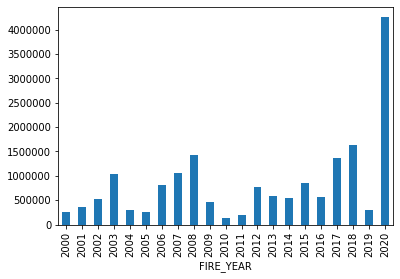

In [6]:
acres_burned = ca_fire_data.groupby('FIRE_YEAR').sum()['FIRE_SIZE']
acres_burned.plot(kind='bar')
plt.show()

# How about a scatterplot mapping wildfires by... acreage burned by year?
# x = (Year of fire)
# y = (acreage burned by fire)
# Looking at the line graph above, there's a high point of wildfires not too long after 2005,
# but looking at the bar graph below, 2020 has the most acres burned!!!
# What's the trend here? Did 2006~2007 have lots of small fires, or did 2020 have a few BIG fires?
# I want a scatterplot like this 
# https://stackoverflow.com/questions/42754458/scatter-plots-in-seaborn-matplotlib-with-point-size-and-color-given-by-continuou

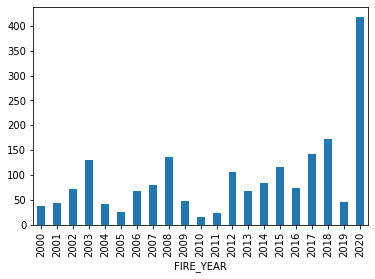

In [7]:
acres_burned = ca_fire_data.groupby('FIRE_YEAR').mean()['FIRE_SIZE']
acres_burned.plot(kind='bar')
plt.show()

In [8]:
grades_year = ca_fire_data.groupby(['FIRE_YEAR','FIRE_SIZE_CLASS']).count()['FPA_ID']
pd.DataFrame(grades_year)
# grades_year.plot(kind='bar',x='FIRE_YEAR')
# plt.figure(figsize=(100,80))
# plt.savefig('grades_year.png')

FPA_ID
FIRE_YEAR FIRE_SIZE_CLASS        
2000      A                  3849
          B                  2698
          C                   300
          D                    61
          E                    36
...                           ...
2020      C                   401
          D                   111
          E                    55
          F                    47
          G                    50

[147 rows x 1 columns]

# 3) Top 5 Causes of Fires

In [9]:
causes = ca_fire_data.groupby('NWCG_GENERAL_CAUSE').count()
top_5_causes = causes.loc[causes['FPA_ID'] > 10000]['FPA_ID']
top_5_causes

NWCG_GENERAL_CAUSE
Arson/incendiarism                         17031
Debris and open burning                    15666
Equipment and vehicle use                  28815
Missing data/not specified/undetermined    78635
Natural                                    19681
Name: FPA_ID, dtype: int64

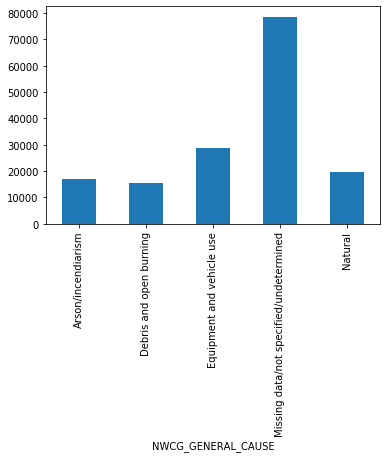

In [10]:
top_5_causes.plot(kind='bar')
plt.show()

# 4) Average Acreage by Cause

In [11]:
ca_fire_data.groupby(["NWCG_GENERAL_CAUSE","NWCG_CAUSE_CLASSIFICATION"]).mean()["FIRE_SIZE"]

NWCG_GENERAL_CAUSE                          NWCG_CAUSE_CLASSIFICATION              
Arson/incendiarism                          Human                                       50.689755
Debris and open burning                     Human                                       23.126971
Equipment and vehicle use                   Human                                       70.590109
Firearms and explosives use                 Human                                      395.150189
Fireworks                                   Human                                       74.081567
Missing data/not specified/undetermined     Human                                       84.936989
                                            Missing data/not specified/undetermined     54.790595
Misuse of fire by a minor                   Human                                       18.064207
Natural                                     Natural                                    328.691873
Other causes                      

# 5) Size vs Duration of Fire (ME)

In [12]:
# YEAR_duration = ca_fire_data.groupby(["FIRE_YEAR"]).mean()["duration"]
# pd.DataFrame(fire_duration)

# YEAR_duration.plot(kind='bar')

NameError: name 'fire_duration' is not defined

It seems that fires are burning longer year after year... with 2008 being a particularly terrible year. (We're going by discovery date and containment date - a longer containment time can mean that a fire was particularly more difficult in containing.) What could make a fire take longer to contain? The fire itself could be burning rapidly, abetted by plenty of fuel, strong warm winds, and other natural conditions, which can also make things difficult for firefighters to work in. It's also possible that a lack of resources and manpower can also be a factor.

Looking below, fires certainly are burning up more acres per year.

Text(0, 0.5, '')

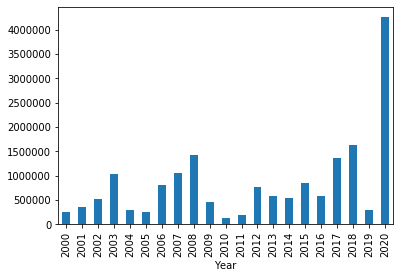

In [13]:
mean_acreage = ca_fire_data.groupby("FIRE_YEAR").sum()["FIRE_SIZE"]
mean_acreage.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("")

In [14]:
fire_duration = ca_fire_data[["FPA_ID","FIRE_NAME","FIRE_YEAR","FIRE_SIZE","FIRE_SIZE_CLASS","DISCOVERY_DATE","CONT_DATE","duration","COUNTY",'LATITUDE', 'LONGITUDE',]]
fire_duration

FPA_ID FIRE_NAME FIRE_YEAR  FIRE_SIZE FIRE_SIZE_CLASS  \
0                 FS-1418826  FOUNTAIN      2005       0.10               A   
1                 FS-1418827    PIGEON      2004       0.25               A   
2                 FS-1418835     SLACK      2004       0.10               A   
3                 FS-1418845      DEER      2004       0.10               A   
4                 FS-1418847  STEVENOT      2004       0.10               A   
...                      ...       ...       ...        ...             ...   
183879  ICS209_2019_10757785     MARIA      2019    9999.00               G   
183880  ICS209_2019_10762771   BELMONT      2019     835.00               E   
183881  ICS209_2019_10781965      ROCK      2019    2422.00               F   
183882  ICS209_2019_10802166    WALKER      2019   54608.00               G   
183883  ICS209_2020_11781527     POWER      2020     100.00               D   

       DISCOVERY_DATE  CONT_DATE  duration           COUNTY   LATITUDE  \
0          2005-02-02 2005-02-02       0.0               63  40.036944   
1          2004-05-12 2004-05-12       0.0               61  38.933056   
2          2004-05-31 2004-05-31       0.0               17  38.984167   
3          2004-06-28 2004-07-03       5.0                3  38.559167   
4          2004-06-28 2004-07-03       5.0                3  38.559167   
...               ...        ...       ...              ...        ...   
183879     2019-10-31        NaT       NaN          Ventura  34.337222   
183880     2019-05-29        NaT       NaN  San Luis Obispo  35.307500   
183881     2019-06-25        NaT       NaN       Stanislaus  37.472222   
183882     2019-09-04        NaT       NaN           Plumas  40.053250   
183883     2020-07-11        NaT       NaN           Madera  37.148611   

         LONGITUDE  
0      -121.005833  
1      -120.404444  
2      -120.735556  
3      -119.913333  
4      -119.933056  
...            ...  
183879 -119.053333  
183880 -119.964444  
183881 -121.249444  
183882 -120.668900  
183883 -119.503056  

[183884 rows x 11 columns]

In [15]:
fire_duration = fire_duration[fire_duration['duration'].notna()]
fire_duration.sort_values('duration')

FPA_ID                  FIRE_NAME FIRE_YEAR  \
0                   FS-1418826                   FOUNTAIN      2005   
95712   SFO-2013CACDFMMU007476                     BONNIE      2013   
95710   SFO-2013CACDFMEU003866                 MOUNTAIN 2      2013   
95709   SFO-2013CACDFLNU004358                       15-1      2013   
95708   SFO-2013CACDFFKU005218                 CALIFORNIA      2013   
...                        ...                        ...       ...   
68415   SFO-2002CACDFMVU001010  POLE                           2002   
32514                 W-220705                   WOODYARD      2001   
183361   IRW-2020-CAMDF-000074                     ARTICA      2020   
68289   SFO-2001CACDFMVU001112  ASH                            2001   
28009                 W-562471                    SOULIER      2000   

        FIRE_SIZE FIRE_SIZE_CLASS DISCOVERY_DATE  CONT_DATE  duration  \
0             0.1               A     2005-02-02 2005-02-02       0.0   
95712         1.0               B     2013-05-09 2013-05-09       0.0   
95710         4.0               B     2013-05-19 2013-05-19       0.0   
95709         1.0               B     2013-06-10 2013-06-10       0.0   
95708        25.0               C     2013-04-24 2013-04-24       0.0   
...           ...             ...            ...        ...       ...   
68415         3.0               B     2002-02-10 2002-09-10     212.0   
32514         0.1               A     2001-01-16 2001-10-16     273.0   
183361        0.1               A     2020-02-22 2020-12-01     283.0   
68289         0.3               B     2001-02-21 2001-12-21     303.0   
28009         0.2               A     2000-01-10 2000-12-10     335.0   

           COUNTY   LATITUDE   LONGITUDE  
0              63  40.036944 -121.005833  
95712      MADERA  36.983550 -120.025200  
95710   MENDOCINO  38.875833 -122.895167  
95709      SOLANO  38.430183 -122.026567  
95708      FRESNO  36.720050 -120.387067  
...           ...        ...         ...  
68415   SAN DIEGO  33.231944 -116.623889  
32514         NaN  37.723800 -119.654600  
183361   Siskiyou  41.600235 -121.584914  
68289   SAN DIEGO  33.043889 -116.850000  
28009      Solano  38.496719 -122.069511  

[107485 rows x 11 columns]

In [16]:
# fire_duration = fire_duration.loc[fire_duration['duration'] != 0.0]
# fire_duration

In [20]:
x = fire_duration["FIRE_SIZE"]
y = fire_duration["duration"]
(slope, intercept, r, p, stderr) = scipy.stats.linregress(x,y)
lin_equ = f"y = ({slope}*x) + {intercept}"
linreg_val = (slope*x) + intercept

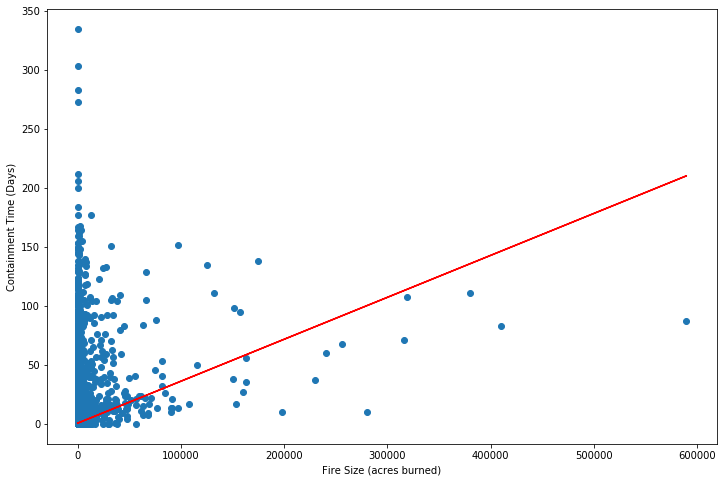

The r-value is 0.2189219826393903


In [21]:
plt.figure(figsize=(12,8))
plt.xlabel("Fire Size (acres burned)")
plt.ylabel("Containment Time (Days)")
plt.scatter(x,y)
plt.plot(x,linreg_val,color='r')
plt.show()

print(f"The r-value is {r}")

### HEAT MAP TESTING

In [33]:
acres_map = fire_duration.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "FIRE_SIZE",
    scale = 0.05,
    color = 'orange'
)

acres_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (FIRE_SIZE)

# 6) Speed vs MOY

# 7) Classifying Fires

# Question 8 (Code Below)